# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ridho Anandamal
- **Email:** a.ridho00@gmail.com
- **ID Dicoding:** ridho_anandamal

## Menentukan Pertanyaan Bisnis

1. Dalam 5 tahun terakhir, Apa saja kategori produk yang memberikan penghasilan terbanyak?
2. Kota mana aja yang memiliki pesanan terbanyak dan jumlah pengguna terbanyak?

Berdasarkan pertanyaan diatas dibutuhkan dataset:
- customers_dataset.csv
- order_items_dataset.csv
- order_payments_dataset.csv
- orders_dataset.csv
- product_category_name_translation.csv
- products_dataset.csv

Untuk menjawab pertanyaan diatas harus menghubungkan dataset-dataset tersebut. Dibawah ini adalah diagram menghubungkan antar dataset.

![Diagram](diagram_data_need.jpg)

# Import Semua Packages/Library yang Digunakan

Di sini tempat menginisialisasi semua package

In [711]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

Proses untuk mendapatkan data-data dan membersihkan sebelum dapat digunakan.

## Gathering Data

Proses mengambil data-data

### Data Orders

In [712]:
orders = pd.read_csv("./dataset/orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Data Order Payments

In [713]:
order_payments = pd.read_csv("./dataset/order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Data Order Items

In [714]:
order_items = pd.read_csv("./dataset/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Data Customers

In [715]:
customers = pd.read_csv("./dataset/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Data Products

In [716]:
products = pd.read_csv("./dataset/products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Data Product Category Name (Inggris)

In [717]:
product_category_name = pd.read_csv("./dataset/product_category_name_translation.csv")
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Kesimpulan

Berikut kolom-kolom setiap data

#### Orders

- order_id
- customer_id	
- order_status
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

#### Order Payments

- order_id
- payment_sequential
- payment_type
- payment_installments
- payment_value

#### Order Items

- order_id
- order_item_id
- product_id
- seller_id
- shipping_limit_date
- price
- freight_value

#### Customers

- customer_id
- customer_unique_id
- customer_zip_code_prefix
- customer_city
- customer_state

#### Products

- product_id
- product_category_name
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

#### Data Product Category Name (Inggris)

- product_category_name
- product_category_name_english

## Assessing Data

### Menilai Data Orders

In [718]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Ternyata ada kesalahan tipe data:
- order_id harusnya `string`
- customer_id harusnya `string`
- order_status harusnya `string`
- order_purchase_timestamp harusnya `datetime`
- order_approved_at harusnya `datetime`
- order_delivered_carrier_date harusnya `datetime`
- order_delivered_customer_date harusnya `datetime`
- order_estimated_delivery_date harusnya `datetime`

In [719]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [720]:
distinct_status = orders['order_status'].unique()
print(distinct_status)

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


Ternyata banyak data NA (not available). Karena ini adalah data dari e-commerce. Bisa dilihat ada beberapa status order.

Kolom `order_estimated_delivery_date` itu tidak ada kosong bearti pengiriman berhasil dan diterima pelanggan

Kolom `order_delivered_customer_date` ada yang kosong bearti pesanan belum sampai ke pelanggan

Kolom `order_delivered_carrier_date` ada yang kosong bearti pesanan belum diterima oleh kurir

Kolom `order_approved_at` ada yang kosong bearti ada pesanan yang `canceled` atau `unavailable`

In [721]:
print("Jumlah duplikasi: ", orders.duplicated().sum())
orders.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Tidak ada duplikat dan tidak ada keanehan data.

### Menilai Data Order Payments

In [722]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Ternyata ada kesalahan tipe data:
- order_id harusnya `string`
- payment_type harusnya `string`

In [723]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Tidak ada data NA

In [724]:
print("Jumlah duplikasi: ",order_payments.duplicated().sum())
order_payments.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Tidak ada duplikat dan tidak ada keanehan data.

### Menilai Data Order Items

In [725]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Ternyata ada kesalahan tipe data:
- order_id harusnya `string`
- shipping_limit_date harusnya `datetime`
- product_id harusnya `string`
- seller_id harusnya `string`

In [726]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak ada data NA

In [727]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Tidak ada duplikat dan tidak ada keanehan data.

### Menilai Data Customers

In [728]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Ternyata ada kesalahan tipe data:
- customer_id harusnya `string`
- customer_unique_id harusnya `string`
- customer_city harusnya `string`
- customer_state harusnya `string`

In [729]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak ada data NA

In [730]:
print("Jumlah duplikasi: ", customers.duplicated().sum())
customers.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Tidak ada duplikat dan tidak ada keanehan data.

### Menilai Data Products

In [731]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Ternyata ada kesalahan tipe data:
- product_id harusnya `string`
- product_category_name harusnya `string`

In [732]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Ternyata ada kolom data 610 NA (not available):
- `product_category_name`
- `product_name_lenght`
- `product_description_lenght`
- `product_photos_qty`

Ada kolom data 2 NA:
- `product_weight_g`
- `product_length_cm`
- `product_height_cm`
- `product_width_cm`

In [733]:
print("Jumlah duplikasi: ", products.duplicated().sum())
products.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Tidak ada duplikat dan tidak ada keanehan data.

### Menilai data Category Name

In [734]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Ternyata ada kesalahan tipe data:
- product_category_name harusnya `string`
- product_category_name_english harusnya `string`

In [735]:
product_category_name.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Tidak ada data NA

In [736]:
print("Jumlah duplikasi: ", product_category_name.duplicated().sum())
product_category_name.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Tidak ada data NA

### Kesimpulan

- Orders
  - Salah tipe data:
    - order_id harusnya `string`
    - customer_id harusnya `string`
    - order_status harusnya `string`
    - order_purchase_timestamp harusnya `datetime`
    - order_approved_at harusnya `datetime`
    - order_delivered_carrier_date harusnya `datetime`
    - order_delivered_customer_date harusnya `datetime`
    - order_estimated_delivery_date harusnya `datetime`
  - Data kosong karena kolom `order_status` ada beberapa status 'delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled', 'created' 'approved'
- Order Payments
  - Salah tipe data:
    - order_id harusnya `string`
    - payment_type harusnya `string`
- Order Items
  - Salah tipe data:
    - order_id harusnya `string`
    - shipping_limit_date harusnya `datetime`
    - product_id harusnya `string`
    - seller_id harusnya `string`
- Customers
  - Salah tipe data:
    - customer_id harusnya `string`
    - customer_unique_id harusnya `string`
    - customer_city harusnya `string`
    - customer_state harusnya `string`
- Products
  - Salah tipe data:
    - product_id harusnya `string`
    - product_category_name harusnya `string`
  - Terdapat 610 missing values pada kolom:
    - `product_category_name`
    - `product_name_lenght`
    - `product_description_lenght`
    - `product_photos_qty`
  - Terdapat 2 missing values pada kolom:
    - `product_weight_g`
    - `product_length_cm`
    - `product_height_cm`
    - `product_width_cm`
- Product_Category
  - Salah tipe data
    - product_category_name harusnya `string`
    - product_category_name_english harusnya `string`

## Cleaning Data

Proses pembersihan data berdasarkan analisa di atas

### Orders

In [737]:
orders[[
	"order_purchase_timestamp",
	"order_approved_at",
	"order_delivered_carrier_date",
	"order_delivered_customer_date",
	"order_estimated_delivery_date"
	]] = orders[[
	"order_purchase_timestamp",
	"order_approved_at",
	"order_delivered_carrier_date",
	"order_delivered_customer_date",
	"order_estimated_delivery_date"
	]].apply(pd.to_datetime)

orders[orders.select_dtypes(include="object").columns] = orders.select_dtypes(include="object").astype("string")
orders.info()

delivered_orders = orders[orders["order_status"] == "delivered"]
print("\n Total baris delivered:", delivered_orders.shape[0])

orders = delivered_orders.dropna()
print("\n Total baris setelah dihapus NA:", orders.shape[0])
orders.isna().sum()

orders.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  string        
 1   customer_id                    99441 non-null  string        
 2   order_status                   99441 non-null  string        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), string(3)
memory usage: 6.1 MB

 Total baris delivered: 96478

 Total baris setelah dihapus NA: 96455


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Sekarang semua tipe data sudah diperbaharui.

Data yang NA sudah dihapus.

### Order Payments

In [738]:
order_payments[order_payments.select_dtypes(include="object").columns] = order_payments.select_dtypes(include="object").astype("string")
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  string 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  string 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), string(2)
memory usage: 4.0 MB


Sekarang semua tipe data sudah diperbaharui.

### Order Items

In [739]:
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

order_items[order_items.select_dtypes(include="object").columns] = order_items.select_dtypes(include="object").astype("string")
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  string        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  string        
 3   seller_id            112650 non-null  string        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), string(3)
memory usage: 6.0 MB


Sekarang semua tipe data sudah diperbaharui.

### Customers

In [740]:
customers[customers.select_dtypes(include="object").columns] = customers.select_dtypes(include="object").astype("string")
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  string
 1   customer_unique_id        99441 non-null  string
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  string
 4   customer_state            99441 non-null  string
dtypes: int64(1), string(4)
memory usage: 3.8 MB


Sekarang semua tipe data sudah diperbaharui.

### Products

In [741]:
products[products.select_dtypes(include="object").columns] = products.select_dtypes(include="object").astype("string")
products.info()

print("\n Total baris product sebelum dihapus NA:", products.shape[0])

products = products.dropna()
print("\n Total baris product sesudah dihapus NA:", products.shape[0])

products.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  string 
 1   product_category_name       32341 non-null  string 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), string(2)
memory usage: 2.3 MB

 Total baris product sebelum dihapus NA: 32951

 Total baris product sesudah dihapus NA: 32340


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Sekarang semua tipe data sudah diperbaharui.

Data yang NA sudah dihapus.

### Product Category

In [742]:
product_category_name[product_category_name.select_dtypes(include="object").columns] = product_category_name.select_dtypes(include="object").astype("string")
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     string
 1   product_category_name_english  71 non-null     string
dtypes: string(2)
memory usage: 1.2 KB


Sekarang semua tipe data sudah diperbaharui.

# Exploratory Data Analysis

Proses eksplorasi data-data yang sudah dibersihkan dan diperbaiki

## Eksplorasi Data Individual

Proses eksplorasi setiap individual dataset

### Orders

In [743]:
orders["year_month"] = orders["order_delivered_customer_date"].dt.to_period("M")
order_counts = orders["year_month"].value_counts().sort_index()

resultOrder = orders.groupby("year_month").agg(
    order_count=("order_id", "count"),
).reset_index()

print("Bulan paling banyak order")
resultOrder.sort_values(by="order_count", ascending=False).head()

Bulan paling banyak order


/var/folders/wg/txvzpfts55z1xjmg1k3179_h0000gn/T/ipykernel_35265/3671990854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders["year_month"] = orders["order_delivered_customer_date"].dt.to_period("M")


,year_month,order_count
22,2018-08,8314
18,2018-04,7850
14,2017-12,7205
19,2018-05,7111
20,2018-06,6829


Ini proses menghitung total order berdasarkan setiap bulan. Ternyata bulan Agustus 2018 dan April 2018 memiliki jumlah pesanan terbanyak.

### Order Payments

In [744]:
resultTotalAmout = order_payments.groupby("payment_type").agg(
	total_amount=("payment_value", "sum")
).reset_index()

resultTotalAmout.sort_values(by="total_amount", ascending=False).head()

,payment_type,total_amount
1,credit_card,12542084.19
0,boleto,2869361.27
4,voucher,379436.87
2,debit_card,217989.79
3,not_defined,0.00


Ini proses menghitung total revenue berdasarkan tipe pembayaran. Dilihat ternyata banyak orang yang membeli menggunakan kartu kredit.

### Order Item

In [745]:
topSeller = order_items.groupby('seller_id').agg(
	total_amount=("price", "sum"),
).reset_index()

topSeller.sort_values(by="total_amount", ascending=False).head()

,seller_id,total_amount
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1013,53243585a1d6dc2643021fd1853d8905,222776.05
881,4a3ca9315b744ce9f8e9374361493884,200472.92
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89


Ini proses pencarian penjual yang menghasilkan banyak penghasilan. `seller_id` 4869f7a5dfa277a7dca6462dcf3b52b2 menghasilkan 229472.63.

### Customer

In [746]:
mostCityCustomer = customers.groupby('customer_city').agg(
	total=("customer_unique_id", "count"),
).reset_index()

mostCityCustomer.sort_values(by="total", ascending=False).head()

,customer_city,total
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521


Ini proses pencarian kota yang memiliki pelanggan terbanyak. Kota Sao Paulo	memiliki pelanggan 15540.

In [747]:
mostStateCustomer = customers.groupby('customer_state').agg(
	total=("customer_unique_id", "count"),
).reset_index()

mostStateCustomer.sort_values(by="total", ascending=False).head()

,customer_state,total
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


Ini proses pencarian negara yang memiliki pelanggan terbanyak. SP (San Paulo)	memiliki pelanggan 41746.

Penasaran kenapa angkanya berbeda (?)

### Product

In [748]:
mostCategories = products.groupby('product_category_name').agg(
	total=("product_id", "count"),
).reset_index()

translatedCategories = pd.merge(mostCategories, product_category_name, how='left', on='product_category_name')

translatedCategories = translatedCategories[["product_category_name_english", "total"]]
translatedCategories.sort_values(by="total", ascending=False).head()

,product_category_name_english,total
13,bed_bath_table,3029
32,sports_leisure,2867
54,furniture_decor,2657
11,health_beauty,2444
72,housewares,2335


Ini proses kategori paling banyak pesanan secara total. kasur, kamar mandi, dan meja paling banyak pesanannya.

### Kesimpulan

Berikut beberapa kesimpulan:
- Bulan Agustus 2018 dan April 2018 memiliki jumlah pesanan terbanyak.
- Banyak orang yang membeli menggunakan kartu kredit.
- Maksimal penghasilan yang di dapatkan oleh penjual yaitu 229472.63.
- Secara perhitungan kota, Sao Paulo memiliki pelanggan 15540.
- Secara perhitungan daerah, SP (San Paulo)	memiliki pelanggan 41746.
- Kategori kasur, kamar mandi, dan meja paling banyak pesanannya.

## Explorasi berdasarkan pertanyaan

Proses eksplorasi berdasarkan pertanyaan

### Pertanyaan 1: Dalam 5 tahun terakhir, Apa saja kategori produk yang memberikan penghasilan terbanyak?

In [749]:
merged_df_first = pd.merge(orders, order_payments, how="left", on="order_id")
merged_df_first = pd.merge(merged_df_first, order_items, how="left", on="order_id")
merged_df_first = pd.merge(merged_df_first, products, how="left", on="product_id")
merged_df_first = pd.merge(merged_df_first, product_category_name, how="left", on="product_category_name")
merged_df_first["year"] = merged_df_first['order_delivered_customer_date'].dt.year

mostCategoriesRevenue = merged_df_first.groupby(["year", 'product_category_name_english']).agg(
	count_orders=("order_id", "count"),
	total_revenue=("payment_value", "sum")
).reset_index().sort_values(by=["year", "total_revenue"], ascending=[True, False])

top_5_per_year = mostCategoriesRevenue.groupby("year").head(5)
top_5_per_year = top_5_per_year.reset_index(drop=True)

top_5_per_year.sort_values(by="year", ascending=False)

,year,product_category_name_english,count_orders,total_revenue
10,2018,health_beauty,6176,1036625.99
11,2018,bed_bath_table,6427,953357.69
12,2018,computers_accessories,4899,903002.89
13,2018,watches_gifts,3905,863574.69
14,2018,furniture_decor,4413,765511.76
5,2017,bed_bath_table,5214,736907.69
6,2017,computers_accessories,2983,645387.74
7,2017,furniture_decor,4067,617760.67
8,2017,sports_leisure,3948,587751.28
9,2017,health_beauty,3541,579363.36


Ternyata tahun paling terakhir yaitu 2016 dan paling terbaru itu 2018. Di setiap tahun ada perbedaan kategori yang paling laris.

- Tahun 2018 paling laku itu `health_beauty`
- Tahun 2017 paling laku itu `bed_bath_table`
- Tahun 2016 paling laku itu `perfumery`

### Pertanyaan 2: Kota mana aja yang memiliki pesanan terbanyak dan jumlah pengguna terbanyak?

In [750]:
merged_df_second = pd.merge(customers, orders, how="left", on="customer_id")
merged_df_second = pd.merge(merged_df_second, order_payments, how="left", on="order_id")

mostCityRevenue = merged_df_second.groupby('customer_city').agg(
	count_users=("customer_id", "count"),
	count_orders=("order_id", "count"),
	total_revenue=("payment_value", "sum")
).reset_index()

mostCityRevenue.sort_values(by="total_revenue", ascending=False).head()

,customer_city,count_users,count_orders,total_revenue
3597,sao paulo,16192,15695,2107933.27
3155,rio de janeiro,7198,6916,1111745.28
453,belo horizonte,2868,2792,406050.87
558,brasilia,2191,2131,345221.87
1143,curitiba,1576,1544,238582.26


Ternyata secara kasar 100-500 pelanggan yang tidak memesan pada setiap kota. Itu juga sebanding dengan total revenue, dilihat Sao Paulo dan Rio De Janeiro perbedaannya bisa dua kali lipat dengan revenue yang sama (dua kali lipat).

In [751]:
mostCityPayment = merged_df_second.groupby(['customer_city', 'payment_type']).agg(
	count=("order_id", "count")
).reset_index().sort_values(by="count", ascending=False)

mostCityPayment.head()

,customer_city,payment_type,count
6446,sao paulo,credit_card,11848
5641,rio de janeiro,credit_card,5303
6445,sao paulo,boleto,2699
772,belo horizonte,credit_card,2176
959,brasilia,credit_card,1654


Tambahan: Ternyata Sao Paulo perbedaan signifikat antara pengguna kartu kredit dan boleto. Wajar karena Sao Paulo adalah salah satu kota terbesar.

### Kesimpulan

Berikut beberapa kesimpulan:
- Ternyata tahun paling terakhir yaitu 2016 dan paling terbaru itu 2018. Di setiap tahun ada perbedaan kategori yang paling laris.
- Ternyata secara kasar 100-500 pelanggan yang tidak memesan pada setiap kota. Itu juga sebanding dengan total revenue, dilihat Sao Paulo dan Rio De Janeiro perbedaannya bisa dua kali lipat dengan revenue yang sama (dua kali lipat).
- Tambahan: Ternyata Sao Paulo perbedaan signifikat antara pengguna kartu kredit dan boleto. Wajar karena Sao Paulo adalah salah satu kota terbesar.

## RFM Analysis

In [752]:

rfm_df = merged_df_first.groupby(by="customer_id", as_index=False).agg(
	max_order_timestamp=("order_delivered_customer_date", "max"),
	frequency=("order_id", "nunique"),
	monetary=("payment_value", "sum"),
)

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders["order_delivered_customer_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,323
1,000161a058600d5901f007fab4c27140,1,67.41,449
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,590
3,0002414f95344307404f0ace7a26f1d5,1,179.35,399
4,000379cdec625522490c315e70c7a9fb,1,107.01,187


Ternyata kebanyakan pelanggan hanya membeli satu kali.

# Data Visualization

### Orders

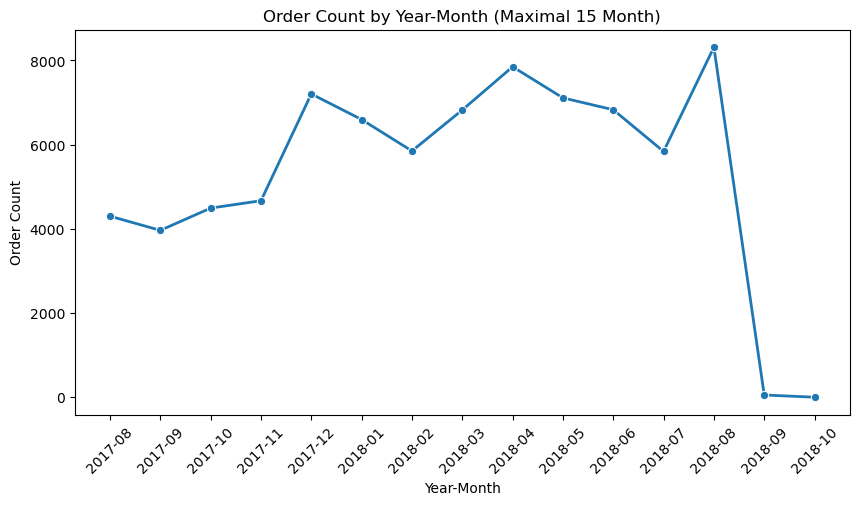

In [753]:
resultOrder["year_month"] = resultOrder["year_month"].astype(str)
resultOrder["order_count"] = pd.to_numeric(resultOrder["order_count"], errors="coerce")  # Ensure numeric

resultOrder = resultOrder.dropna(subset=["order_count"])
resultOrder = resultOrder.sort_values(by="year_month")
resultOrder = resultOrder.tail(15)

plt.figure(figsize=(10, 5))
 
sns.lineplot(
    y="order_count",
    x="year_month",
	marker='o',
	linewidth=2,
    data=resultOrder
)
plt.title("Order Count by Year-Month (Maximal 15 Month)")
plt.xlabel("Year-Month")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()


Berikut adalah visual jumlah pemesanan setiap bulan. Dilihat ada penurunan signifikat pada bulan September 2018 dan Oktober 2018.

### Order Payments

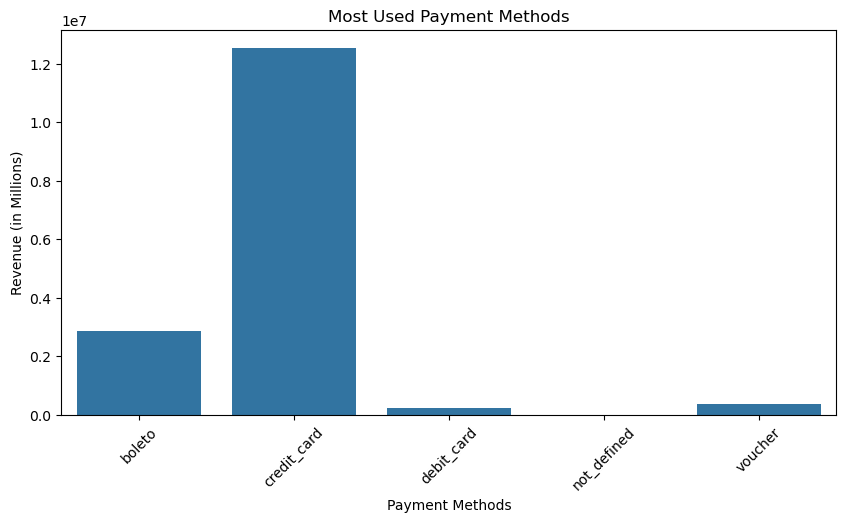

In [754]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_amount",
    x="payment_type",
    data=resultTotalAmout
)
plt.title("Most Used Payment Methods")
plt.xlabel("Payment Methods")
plt.ylabel("Revenue (in Millions)")
plt.xticks(rotation=45)
plt.show()


Berikut adalah visual pengguna metode pembayaran. Paling banyak kartu kredit

### Order Items

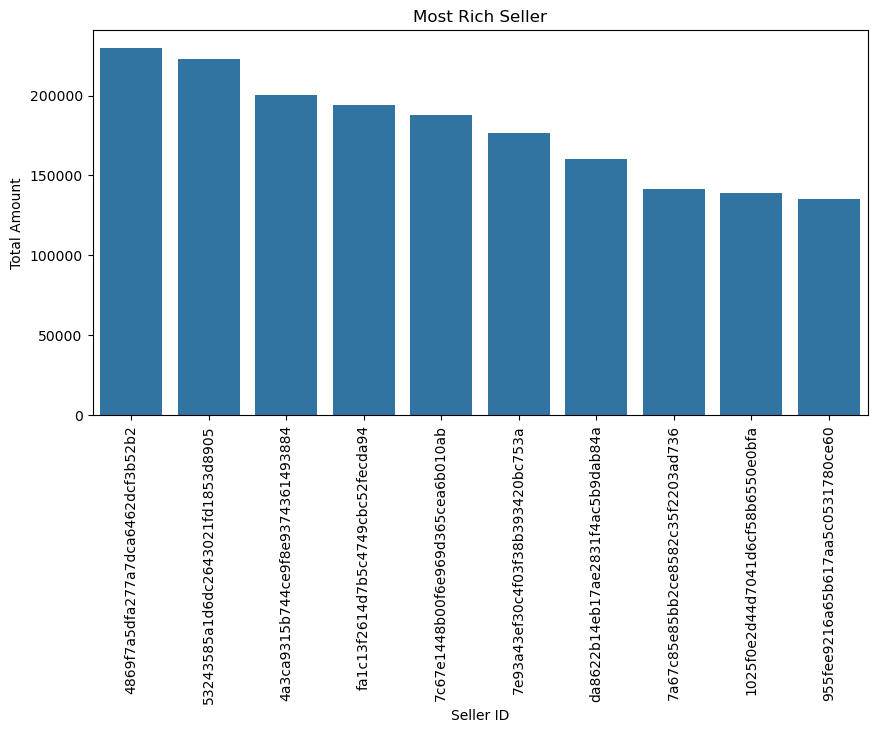

In [755]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_amount",
    x="seller_id",
    data=topSeller.sort_values(by="total_amount", ascending=False).head(10)
)
plt.title("Most Rich Seller")
plt.xlabel("Seller ID")
plt.ylabel("Total Amount")
plt.xticks(rotation=90)
plt.show()

Berikut adalah visual penghasilan setiap seller diurutkan paling banyak.

### Customer

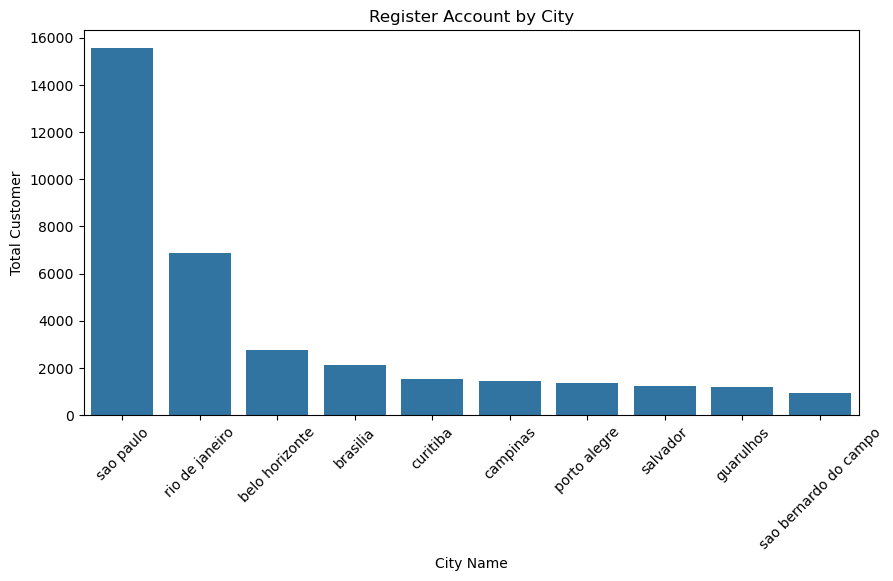

In [756]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total",
    x="customer_city",
    data=mostCityCustomer.sort_values(by="total", ascending=False).head(10)
)
plt.title("Register Account by City")
plt.xlabel("City Name")
plt.ylabel("Total Customer")
plt.xticks(rotation=45)
plt.show()

Berikut adalah visual perbandingan kota paling banyak pelanggan.

### Products

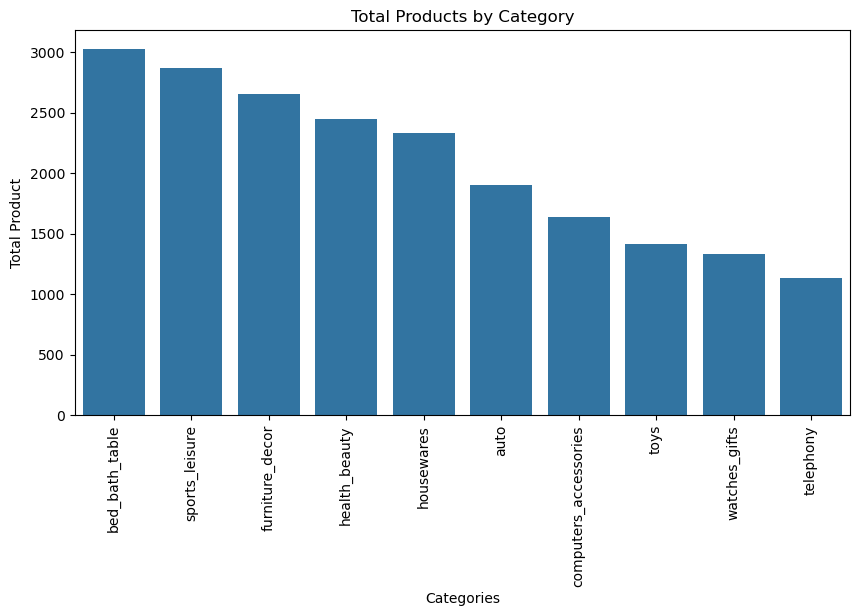

In [757]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total",
    x="product_category_name_english",
    data=translatedCategories.sort_values(by="total", ascending=False).head(10)
)
plt.title("Total Products by Category")
plt.xlabel("Categories")
plt.ylabel("Total Product")
plt.xticks(rotation=90)
plt.show()

Berikut adalah visual kategori yang paling banyak pesanan.

### Pertanyaan 1: Dalam 5 tahun terakhir, Apa saja kategori produk yang memberikan penghasilan terbanyak?

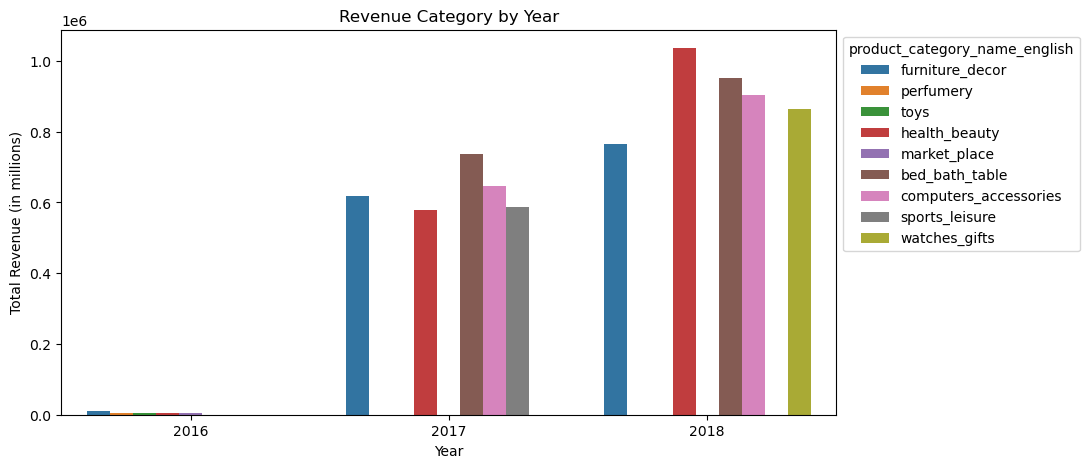

In [758]:
plt.figure(figsize=(10, 5))

chart_1 = sns.barplot(
    y="total_revenue",
    x="year",
		hue="product_category_name_english",
    data=top_5_per_year
)

sns.move_legend(chart_1, "upper left", bbox_to_anchor=(1, 1))

plt.title("Revenue Category by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue (in millions)")
plt.show()

Berikut adalah visual revenue setiap tahun dan dibagi berdasarkan kategori. Setiap tahun ada peningkatan revenue

### Pertanyaan 2: Kota mana aja yang memiliki pesanan terbanyak dan jumlah pengguna terbanyak?

/var/folders/wg/txvzpfts55z1xjmg1k3179_h0000gn/T/ipykernel_35265/1852265265.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Orders", bbox_to_anchor=(1.05, 1), loc="upper left")


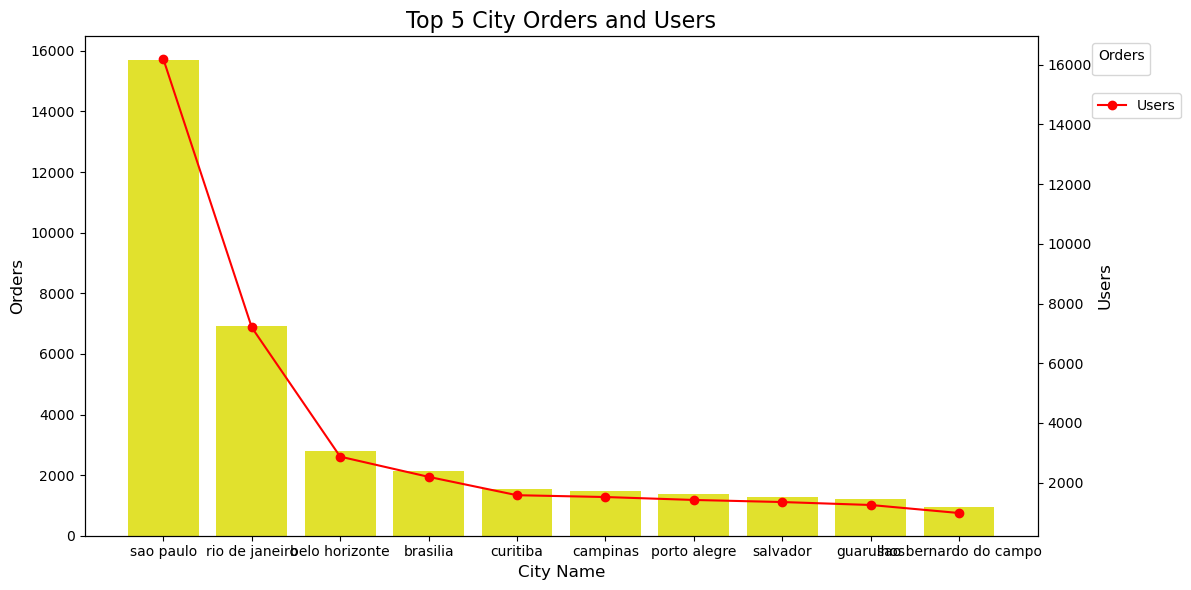

In [759]:
fig, ax = plt.subplots(figsize=(12, 6))

limit_ten = mostCityRevenue.sort_values(by="count_orders", ascending=False).head(10)

sns.barplot(
    y="count_orders",
    x="customer_city",
	ax=ax,
    data=limit_ten,
	color="#ffff0f"
)

ax.set_ylabel("Orders", fontsize=12)
ax.set_title("Top 5 City Orders and Users", fontsize=16)
ax.legend(title="Orders", bbox_to_anchor=(1.05, 1), loc="upper left")

ax2 = ax.twinx()
ax2.plot(
    limit_ten["customer_city"], 
    limit_ten["count_users"], 
    color="red", 
    marker="o", 
    label="Users"
)

ax2.set_ylabel("Users", fontsize=12)
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 0.9))

ax.set_xlabel("City Name", fontsize=12)

plt.tight_layout()
plt.show()

Berikut adalah visual perbandingan pengguna dan pesanan setiap kota. Dilihat tidak ada perbedaan signifikat antara pengguna dan pesanan.

# Kesimpulan

Berikut beberapa kesimpulan dari hasil eksplorasi data:

- Setiap tahun ada peningkatan revenue, tetapi jika ditelusuri setiap bulan, ada penurunan pada bulan September 2018 dan Oktober 2018.
- Secara keseluruhan tidak ada perbedaan besar dengan jumlah pelanggan dan jumlah pesanan. Bearti tidak ada pelanggan yang hanya mendaftar tanpa ada pembelian produk.
- Secara keseluruhan kategori yang paling laku itu kasur, kamar mandi, dan meja.
- Pelanggan lebih suka menggunakan kartu kredit.

#### Tambahan

Ekspor data ke CSV buat dashboard

In [763]:
all_df = pd.merge(merged_df_first, customers, how="left", on="customer_id")
all_df.to_csv("./dashboard/all_dataframe.csv", index=False)

# mostCategoriesRevenue.to_csv("./dashboard/revenue_categories_by_year.csv", index=False)
# mostCityRevenue.to_csv("./dashboard/total_users_and_orders_by_city.csv", index=False)